# ConvNet HandsOn with Keras

## Problem Definition

*Recognize handwritten digits*

## Data

The MNIST database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. 

The training set has $60,000$ samples. 
The test set has $10,000$ samples.

The digits are size-normalized and centered in a fixed-size image. 

The data page has description on how the data was collected. It also has reports the benchmark of various algorithms on the test dataset. 

### Load the data

The data is available in the repo's `data` folder. Let's load that using the `keras` library. 

For now, let's load the data and see how it looks.

In [1]:
import numpy as np
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
# Load the datasets
# Uncomment to download the dataset
#!mkdir -p $HOME/.keras/datasets/mnist/data/
#path_to_dataset = "mnist/data/mnist.pkl.gz"
#(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [2]:
# this code loads a local version of mnist dataset 
import pickle
import gzip
import sys

def load_mnist_local(path):
    if path.endswith(".gz"):
        f = gzip.open(path, 'rb')
    else:
        f = open(path, 'rb')

    if sys.version_info < (3,):
        data = pickle.load(f)
    else:
        data = pickle.load(f, encoding="bytes")

    f.close()
    return data

path_to_dataset = "data/mnist.pkl.gz"
(X_train, y_train), (X_test, y_test) = load_mnist_local(path_to_dataset)

# Basic data analysis on the dataset

In [3]:
# What is the type of X_train? -> Numpy array
type(X_train)

numpy.ndarray

In [4]:
# What is the type of y_train?
type(y_train)

numpy.ndarray

In [5]:
# Find number of observations in training data: 60.000 handwritten digits with the resolution 28x28
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [10]:
# Find number of observations in test data


In [8]:
# Display first 2 records of X_train
X_train[0:1,:,:]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [9]:
# Display the first 10 records of y_train
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [26]:
# Find the number of observations for each digit in the y_train dataset 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [13]:
# Find the number of observations for each digit in the y_test dataset 
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [5]:
# What is the dimension of X_train?. What does that mean?



(60000, 28, 28)

### Display Images

Let's now display some of the images and see how they look

We will be using `matplotlib` library for displaying the image

In [10]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

In [26]:
# Displaying the first training data

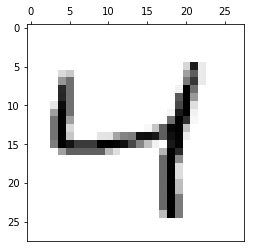

In [13]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
# takes values of 2nd data point and plots them
imgplot = ax.imshow(X_train[2], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

In [ ]:
# Let's now display the 11th record

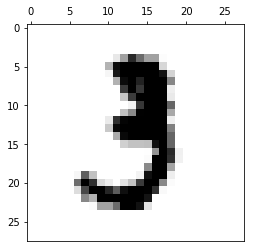

In [19]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[10], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()